<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects/blob/Thanuja-Gogada/Task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK 5**

**Cohort and Segment Analysis**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

Saving Indian_Kids_Screen_Time_cleaned.csv to Indian_Kids_Screen_Time_cleaned.csv


**Heatmap: Age Band vs Primary Device**

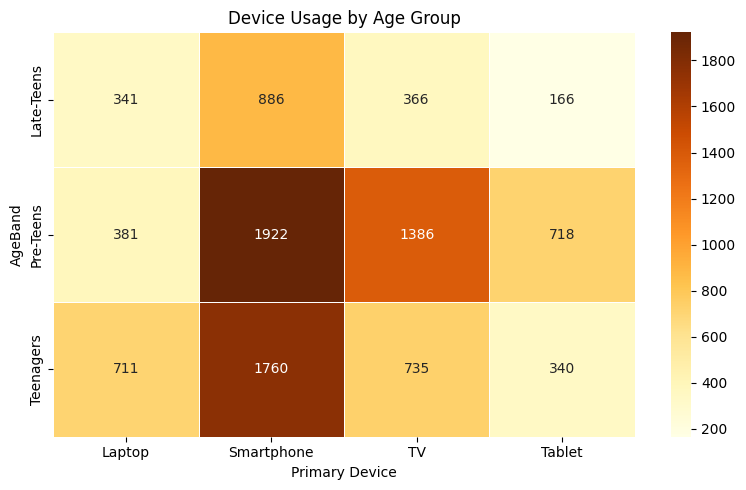

In [12]:
# Top cohorts: Agegroup and PrimaryDevice counts
plt.figure(figsize=(8, 5))
sns.heatmap(cohorts, annot=True, fmt='d', cmap='YlOrBr', linewidths=0.7, linecolor='white')
plt.title('Device Usage by Age Group')
plt.xlabel('Primary Device')
plt.ylabel('AgeBand')
plt.tight_layout()
plt.show()


**Observation:**
Smartphones dominate as the primary device for all age groups.

TVs are consistently second, while laptops and tablets are less preferred.

This highlights that mobile devices are central to kids’ and teens’ daily digital activity

**Heatmap: Exceeding Screen Time Limit by Age Group**

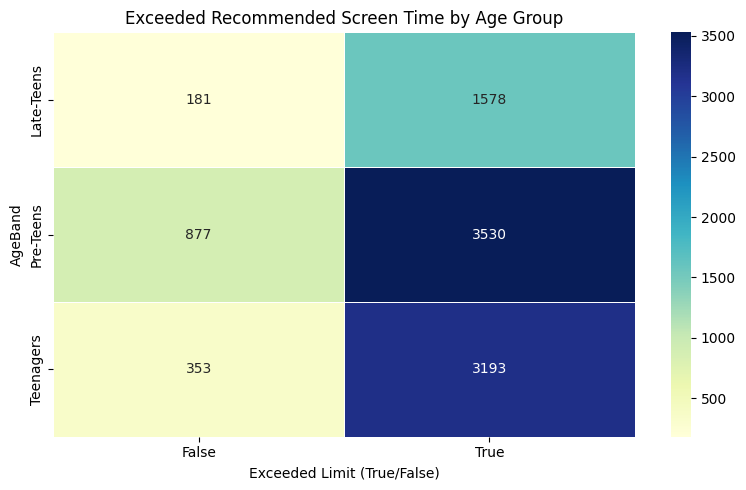

In [15]:
ct2 = pd.crosstab(df['AgeBand'], df['Exceeded_Recommended_Limit'])
plt.figure(figsize=(8, 5))
sns.heatmap(ct2, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.7, linecolor='white')
plt.title('Exceeded Recommended Screen Time by Age Group')
plt.xlabel('Exceeded Limit (True/False)')
plt.ylabel('AgeBand')
plt.tight_layout()
plt.show()


**Observation:**
The majority (80–90%) in every age group exceeded recommended daily screen time.

Teenagers are most likely to be over the limit, reflecting higher digital dependency.​



Heatmap of AvgDailyScreenTimehr by AgeBand and DeviceCategory

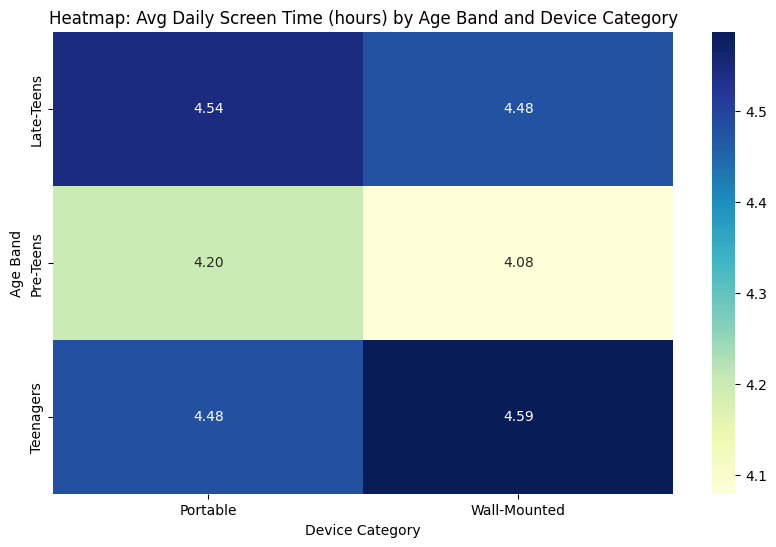

In [3]:
# Pivot the data for heatmap
heatmap_data = cohort_summary.pivot(index='AgeBand', columns='Device_Category', values='Avg_Daily_Screen_Time_hr')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap: Avg Daily Screen Time (hours) by Age Band and Device Category')
plt.ylabel('Age Band')
plt.xlabel('Device Category')
plt.show()

**Health Status Across Urban and Rural Segments**


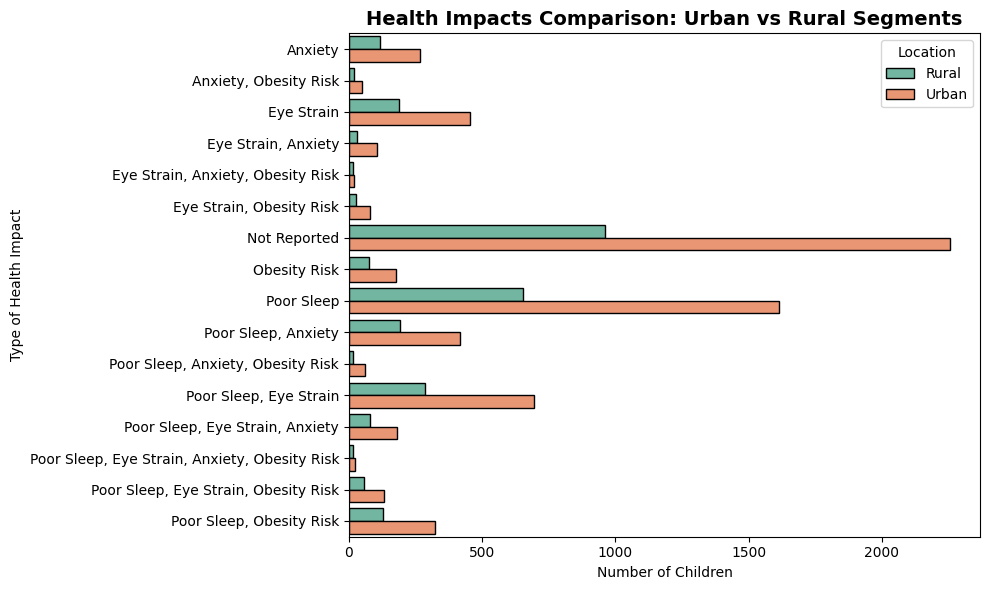

In [34]:
health_summary = df.groupby(['Health_Impacts', 'Urban_or_Rural']).size().reset_index(name='Count')

# Plot a horizontal grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=health_summary,
    y='Health_Impacts',
    x='Count',
    hue='Urban_or_Rural',
    palette='Set2',
    edgecolor='black'
)

plt.title('Health Impacts Comparison: Urban vs Rural Segments', fontsize=14, weight='bold')
plt.xlabel('Number of Children')
plt.ylabel('Type of Health Impact')
plt.legend(title='Location', loc='best')
plt.tight_layout()
plt.show()



**Observation:**
Mental health impacts are more prevalent in urban areas compared to rural.

Physical health impacts have a smaller but notable presence in both regions.

Rural children more frequently report "No Impact" or fewer health issues than urban counterparts.

The grouped bar chart allows clearer comparison of each health impact category side by side for urban and rural populations.

**Stacked Bar Chart: AvgDailyScreenTimehr by AgeBand segmented by UrbanorRural**

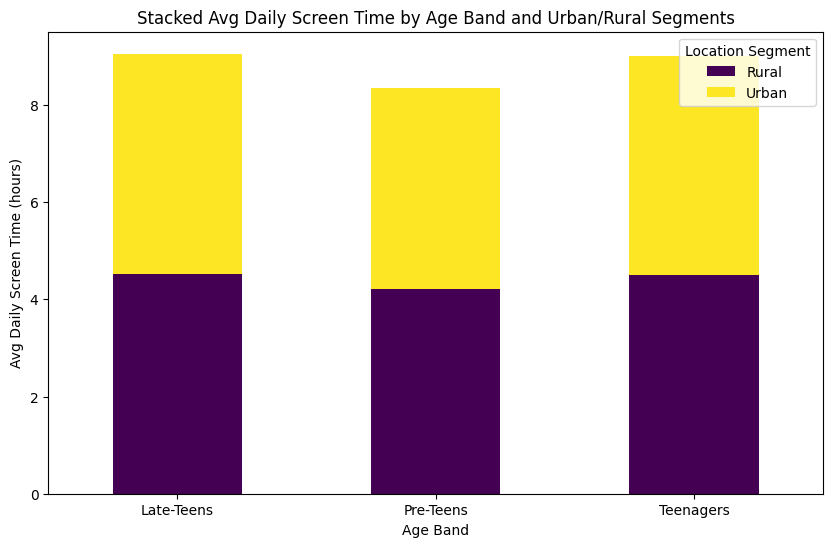

In [4]:
# Group by AgeBand and UrbanorRural and sum average screen time (or mean if preferred)
stacked_data = df.groupby(['AgeBand', 'Urban_or_Rural'], as_index=False)['Avg_Daily_Screen_Time_hr'].mean()

# Pivot for stacked bar
stacked_pivot = stacked_data.pivot(index='AgeBand', columns='Urban_or_Rural', values='Avg_Daily_Screen_Time_hr')

# Plot stacked bar chart
stacked_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Avg Daily Screen Time by Age Band and Urban/Rural Segments')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.xlabel('Age Band')
plt.xticks(rotation=0)
plt.legend(title='Location Segment')
plt.show()

**Observation:**

Urban users consistently record higher screen time across all ages.

Rural usage stays moderate, except among teens, where gaps narrow.

Suggests better digital accessibility in cities and shifting trends in rural areas.

**Stacked Bar Chart: AvgDailyScreenTimehr by DeviceCategory segmented by UrbanorRural**


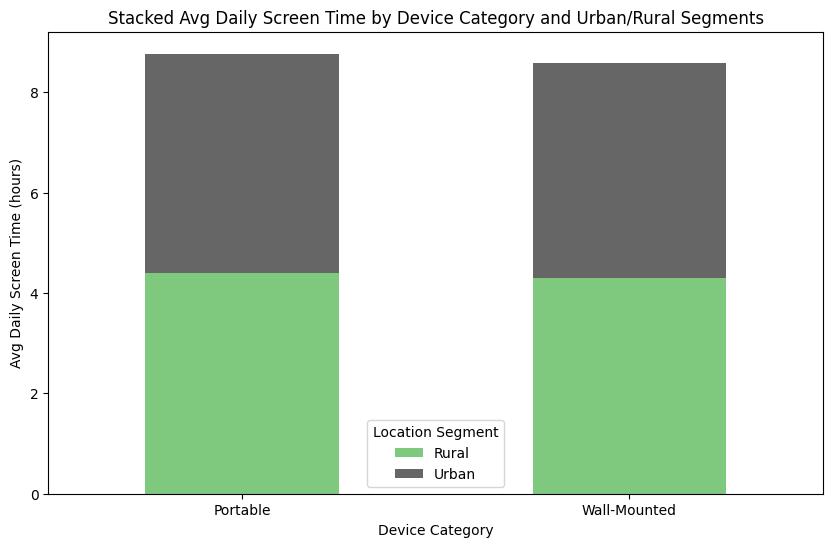

In [5]:
# Group by DeviceCategory and UrbanorRural
device_urban_data = df.groupby(['Device_Category', 'Urban_or_Rural'], as_index=False)['Avg_Daily_Screen_Time_hr'].mean()

# Pivot data for stacked bar chart
device_urban_pivot = device_urban_data.pivot(index='Device_Category', columns='Urban_or_Rural', values='Avg_Daily_Screen_Time_hr')

# Plot
device_urban_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Accent')
plt.title('Stacked Avg Daily Screen Time by Device Category and Urban/Rural Segments')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.xlabel('Device Category')
plt.xticks(rotation=0)
plt.legend(title='Location Segment')
plt.show()


**Observation:**

Smartphones dominate in both urban and rural contexts, but urban users spend longer hours.

TVs have moderate rural usage, possibly due to shared family viewing.

Tablets and laptops remain niche but show growing penetration in urban areas.